In [15]:
import json
import pandas as pd
import numpy as np
from pathlib import Path

In [18]:
data_classes = ['yelp', 'reddit', 'stackexchange']

In [19]:
numberOfUsers = []
numberOfReviews = []
for data_class in data_classes:
    if data_class == 'yelp':
        data_dir = Path.cwd() / 'datasets/yelp/'
    elif data_class == 'reddit':
        data_dir = Path.cwd() / 'datasets/reddit/'
    elif data_class == 'stackexchange':
        data_dir = Path.cwd() / 'datasets/stackexchange/'
    else:
        print('Class not found.')
        
    disclosed_gender_df = pd.read_csv(data_dir / 'disclosed_dataset.csv')
    undisclosed_gender_df = pd.read_csv(data_dir / 'undisclosed_dataset.csv')
    
    if data_class == 'yelp':
        numberOfUsers.append(disclosed_gender_df.user_id.unique().shape[0] + undisclosed_gender_df.user_id.unique().shape[0])
        numberOfReviews.append(disclosed_gender_df.shape[0] + undisclosed_gender_df.shape[0])
    elif data_class == 'reddit':
        numberOfUsers.append(disclosed_gender_df.UserName.unique().shape[0] + undisclosed_gender_df.UserName.unique().shape[0])
        numberOfReviews.append(disclosed_gender_df.shape[0] + undisclosed_gender_df.shape[0])
    elif data_class == 'stackexchange':
        numberOfUsers.append(disclosed_gender_df.UserId.unique().shape[0] + undisclosed_gender_df.UserId.unique().shape[0])
        numberOfReviews.append(disclosed_gender_df.shape[0] + undisclosed_gender_df.shape[0])
    else:
        print('Class not found.')

        

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


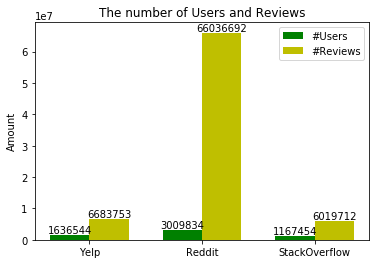

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
numberOfUsers = (yelp_data[0],reddit_data[0], stack_data[0])
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, numberOfUsers, width, color='g')

numberOfReviews = (yelp_data[1],reddit_data[1], stack_data[1])
# women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, numberOfReviews, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Amount')
ax.set_title('The number of Users and Reviews')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Yelp', 'Reddit', 'StackOverflow'))

ax.legend((rects1[0], rects2[0]), ('#Users', '#Reviews'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
# plt.savefig("dataset_statistic.png", dpi=300)